# Algoritmos de Clusterização

## Mudando o Dataset...

## Aprendizados Supervisionado vs. Não supervisionado

* Supervisionado: variável respostas classificada (labeled target)
* **Não**-supervisionado: variável resposta **não** classificada ou não definida.

<img src=images/sup-vs-unsup.png>

Na prática:

<img src= images/clustering.jpg>

In [2]:
# !pip install mlxtend

## K-Means

1. Escolha aleatória de N exemplos do conjunto de dados que serão os centróides iniciais;
2. Por meio de uma métrica de proximidade, assimila cada instância do conjunto de dados a um centróide;
3. Cria novos N centróides baseado na média de todos os exemplos associados a um centróide específico.


> [Gif animado](https://commons.wikimedia.org/wiki/File:K-means_convergence.gif)  
> [Vídeo explicativo](https://youtu.be/QXOkPvFM6NU?t=244)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mlxtend.plotting import plot_decision_regions

from sklearn.datasets import make_blobs, make_moons

### X_blobs e y_blobs

- X_blobs: as variáveis de entrada (as coordenadas dos pontos)
- y_blobs: as variáveis de saída (resposta) - o cluster ao qual cada ponto pertence

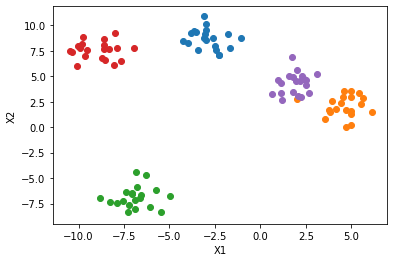

In [4]:
n_centers = 5
X_blobs, y_blobs = make_blobs(n_samples = 100, n_features = 2, cluster_std = 1., 
                              centers = n_centers, random_state=42)

for i in range(n_centers):
    plt.scatter(X_blobs[y_blobs == i, 0], X_blobs[y_blobs == i, 1])

plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

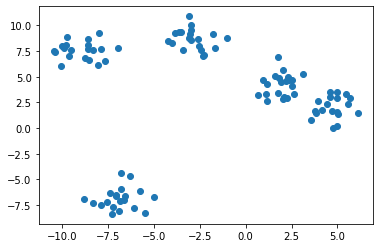

In [5]:
plt.scatter(X_blobs[:,0], X_blobs[:,1])

In [6]:
y_blobs

array([2, 4, 0, 4, 3, 2, 1, 1, 1, 0, 0, 2, 4, 0, 1, 3, 4, 4, 2, 3, 3, 1,
       0, 2, 3, 3, 4, 4, 4, 1, 2, 3, 4, 4, 1, 3, 0, 0, 0, 1, 2, 1, 1, 1,
       3, 0, 0, 2, 3, 4, 4, 1, 1, 2, 1, 3, 4, 4, 0, 0, 1, 0, 3, 2, 3, 2,
       4, 4, 2, 4, 3, 2, 2, 2, 4, 3, 1, 3, 4, 2, 4, 2, 3, 1, 3, 0, 3, 0,
       0, 0, 3, 0, 2, 1, 2, 0, 2, 0, 1, 1])

### Aplicando o K-means

In [7]:
# como modelar? ==>> padrão sklearn!
km=KMeans(n_clusters=5)

km.fit(X_blobs) # Diferença! Não passamos a variável resposta (target)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
# mas então, o que o predict faz?
y_pred=km.predict(X_blobs)
y_pred

array([2, 1, 3, 1, 0, 2, 4, 4, 4, 3, 3, 2, 1, 3, 4, 0, 1, 1, 2, 0, 0, 4,
       3, 2, 0, 0, 1, 1, 1, 4, 2, 0, 1, 1, 1, 0, 3, 3, 3, 4, 2, 4, 4, 4,
       0, 3, 3, 2, 0, 1, 1, 4, 4, 2, 4, 0, 1, 1, 3, 3, 4, 3, 0, 2, 0, 2,
       1, 1, 2, 1, 0, 2, 2, 2, 1, 0, 4, 0, 1, 2, 1, 2, 0, 4, 0, 3, 0, 3,
       3, 3, 0, 3, 2, 4, 2, 3, 2, 3, 4, 4], dtype=int32)

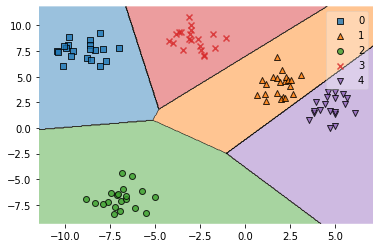

In [9]:
# Vamos visualizar a região de decisão do K-means
plot_decision_regions(X_blobs,y_pred,clf=km)

### Métodos do [K-means](https://scikit-learn.org/stable/modules/clustering.html#k-means):
- cluster centers
- inertia

In [10]:
# Visualizando os centróides
km.cluster_centers_

array([[-8.97484095,  7.55134937],
       [ 1.90144007,  4.22597687],
       [-6.88732163, -6.84846391],
       [-2.87559086,  8.66758942],
       [ 4.73987759,  2.0192694 ]])

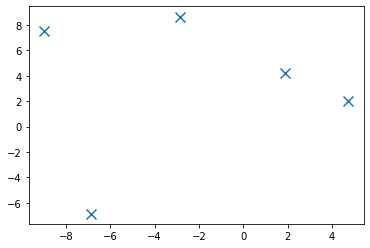

In [11]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x',s=100)

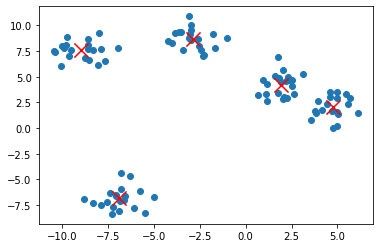

In [12]:
plt.scatter(X_blobs[:,0], X_blobs[:,1])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x',s=200,color='red')

In [13]:
# sum(distância do centroide para cada ponto do seu cluster)²
km.inertia_

159.83755106823412

inercia: 0.0


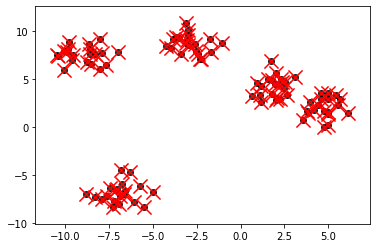

In [14]:
# E, se utilizássemos 100 centros, ao invés de 5?
km=KMeans(n_clusters=100)

km.fit(X_blobs)
print('inercia:',km.inertia_)
plt.scatter(X_blobs[:,0], X_blobs[:,1],alpha=0.8,c='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='x',s=200,color='red')

### Qual o melhor número de centros?
**O método do cotovelo** (elbow method)

In [15]:
inercias=[]
range_centers=list(range(2,15))
for i in range_centers:
    km=KMeans(n_clusters=i)
    km.fit(X_blobs)
    inercias.append(km.inertia_)

In [16]:
inercias

[2843.2556179883477,
 673.2456833583316,
 288.77724763126685,
 159.83755106823412,
 142.47726207882775,
 126.89920187544628,
 112.83148204866768,
 97.25342184528623,
 87.24327014106346,
 76.14706879107555,
 71.61984411398115,
 65.7808219650247,
 60.121210838594564]

In [17]:
range_centers

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

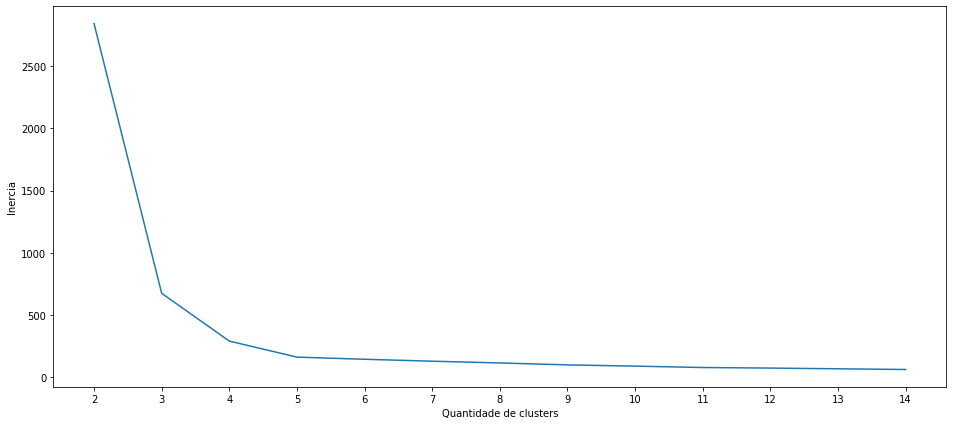

In [18]:
plt.figure(figsize=(16,7))
plt.plot(range_centers,inercias)
plt.xlabel('Quantidade de clusters')
plt.ylabel('Inercia')
plt.xticks(range_centers)
plt.show()

**Encontrar o último ponto antes de a linha ficar plana!**

Nem sempre é fácil decidir!

### Para praticar: aplique o K-means ao dataset da Iris

### Mudando o Dataset...

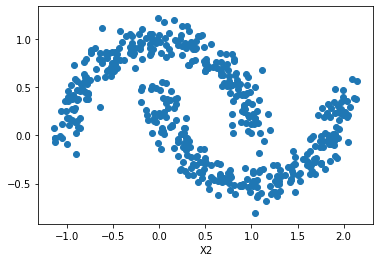

In [19]:
from sklearn.datasets import make_moons

X_moon,y_moon=make_moons(n_samples=500,noise=0.1,random_state=0)

plt.scatter(X_moon[:,0],X_moon[:,1])
plt.xlabel('X1')
plt.xlabel('X2')
plt.show()

### APlicando o K-means nesse dataset

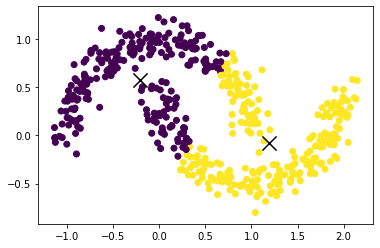

In [20]:
km_moon = KMeans(n_clusters=2)

km_moon.fit(X_moon)

y_pred = km_moon.predict(X_moon)

# plot features X1 e X2 marcadas com a "cor" da previsão do modelo KMeans
plt.scatter(X_moon[:,0], X_moon[:,1], c=y_pred) 

# plot centroids
plt.scatter(km_moon.cluster_centers_[:,0], km_moon.cluster_centers_[:,1], marker='x', s=200, c='black')

plt.show()

Comparando o gráfico original e o predito, você pode concluir que a clusterização foi boa? 
Resposta abaixo!

### Reintroduzindo as labels: impossível na vida real!
-  É um grande desafio avaliar modelos de clusterização

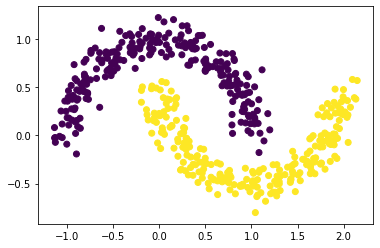

In [21]:
# dataset original com as classificações que foram ocultadas no primeiro gráfico
plt.scatter(X_moon[:,0], X_moon[:,1], c=y_moon)

## DBSCAN: Density-based spatial clustering

1. Dado um ponto p, encontra todos os pontos q que estão a uma distância igual ou inferior a $\varepsilon$ de p;
2. Repete o processo para todos os pontos encontrados, e para todos os pontos novos, recursivamente, determinando assim um grupo;
3. Procura um ponto ainda não visitado para iniciar um novo grupo e repetir os passos 1 e 2.
4. Determina como ruído os pontos que não fazem parte de nenhum grupo.

,X1,X2,predict_dbscan
0,0.362034,0.901495,0
1,-0.192355,0.468432,1
2,0.137820,0.104412,1
3,1.745660,-0.120071,1
4,1.927158,-0.238542,1
...,...,...,...
495,0.499501,-0.236321,1
496,-0.786429,0.532435,0
497,-0.183251,1.110700,0
498,0.770350,0.513998,0


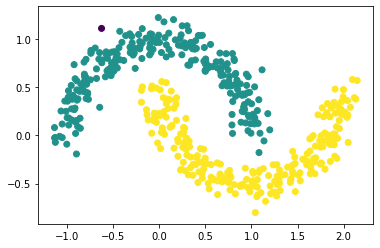

In [22]:
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.18, min_samples=5)

y_pred = dbs.fit_predict(X_moon) # fit_predict: método para treinar o modelo e fazer o predict

## construção do plot mais intuitiva
df_moon = pd.DataFrame(X_moon, columns=['X1', 'X2'])
df_moon['predict_dbscan'] = y_pred

plt.scatter(df_moon['X1'], df_moon['X2'], c=df_moon['predict_dbscan'])

df_moon

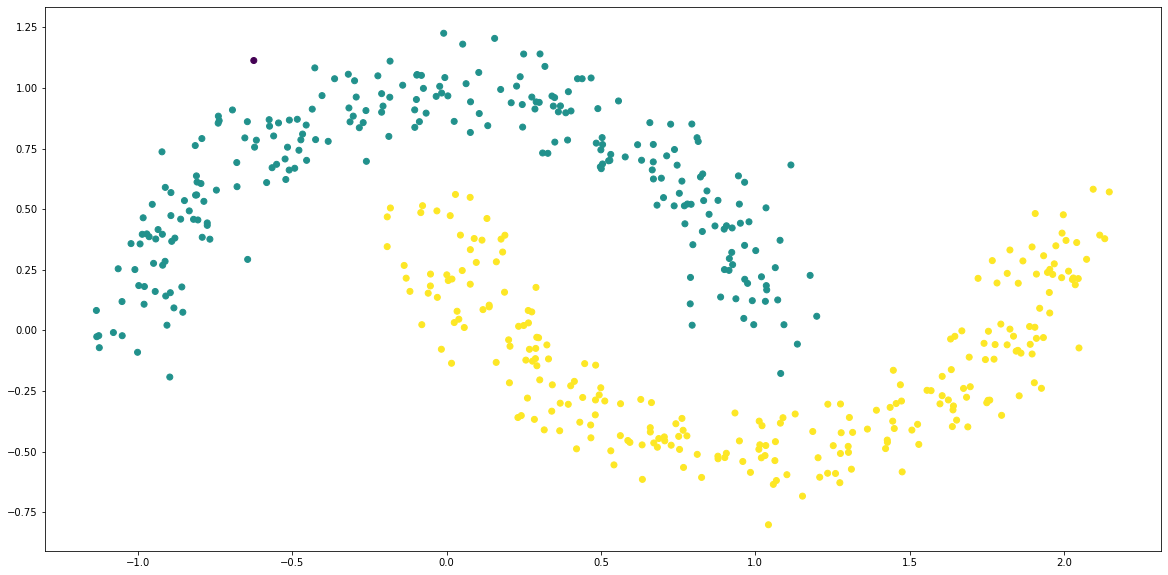

In [23]:
plt.figure(figsize=(20, 10))
plt.scatter(X_moon[:,0], X_moon[:,1], c=y_pred)

In [24]:
df_moon['predict_dbscan'].unique()

array([ 0,  1, -1])